## 뉴스를 이용한 워드 클라우드 제작

### 데이터 확인

In [17]:
import pandas as pd
import numpy as np

In [18]:
df_bosa = pd.read_csv("./bosa_news_all.csv")
df_bosa.head()

,news_title,news_url,news_when,news_topic,news_paper,news_contents
0,"한국쿄와기린, 세계 희귀질환의 날 행사 참여",http://www.bosa.co.kr/news/articleView.html?id...,2024.02.29,의료/법안,의학신문,[의학신문·일간보사=김영주 기자]‘세계 희귀질환의 날’을 맞아 한국쿄와기린은 그룹에...
1,"광동제약, ‘세계 희귀질환의 날’ 기념 환아 작품 전시회 개최",http://www.bosa.co.kr/news/articleView.html?id...,2024.02.29,신약/개발,의학신문,[의학신문·일간보사=김영주 기자]광동제약(대표 최성원)은 ‘세계 희귀질환의 날’을 ...
2,"순천향대 부천병원 신영림 교수, ‘질병관리청장 표창’ 수상",http://www.bosa.co.kr/news/articleView.html?id...,2024.02.29,심포지엄/행사,의학신문,[의학신문·일간보사=이상만 기자]순천향대 부천병원 소아청소년과 신영림 교수(사진)가...
3,"창립 70주년 한독, ‘THANKS CAMPAIGN’ 실시",http://www.bosa.co.kr/news/articleView.html?id...,2024.02.29,의료/법안,의학신문,"[의학신문·일간보사=김정일 기자] 한독(대표이사 김영진, 백진기)이 창립 70주년을..."
4,[세계 희귀질환의 날] 국가‧사회‧이웃‧의료진‧가족 함께 가야 한다,http://www.bosa.co.kr/news/articleView.html?id...,2024.02.29,신약/개발,의학신문,[의학신문·일간보사=오인규 기자] “이건 신이 실수를 하신 거다. 그러니 너무 자책...


In [19]:
df_bosa.isnull().sum()

news_title         0
news_url           0
news_when          0
news_topic         0
news_paper         0
news_contents    283
dtype: int64

In [20]:
df_bosa.reset_index(inplace=True)

In [21]:
df_bosa_test1 = df_bosa.copy()
df_bosa_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          2425 non-null   int64 
 1   news_title     2425 non-null   object
 2   news_url       2425 non-null   object
 3   news_when      2425 non-null   object
 4   news_topic     2425 non-null   object
 5   news_paper     2425 non-null   object
 6   news_contents  2142 non-null   object
dtypes: int64(1), object(6)
memory usage: 132.7+ KB


### 토큰화

In [22]:
stopwords = ['희귀질환', '병원', '치료', '의료', '한국']
f=open('./korean_stopwords_basic.txt')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()

In [23]:
from konlpy.tag import Okt
okt = Okt()
def tokenizer(raw, pos=['Noun', 'Verb'], stopword=stopwords):
    return [
        word for word, tag in okt.pos(raw, norm=True, stem=True)
        if len(word) >1 and tag in pos and word not in stopword
    ]

In [13]:
# news_title_array = df_bosa_test1['news_title'][101:210].values
# news_title_text = ' '.join(news_title_array)
# news_title_text = tokenizer(news_title_text)
# news_title_text = ' '.join(news_title_text)

### 워드 클라우드 만들기

In [24]:
!pip install wordcloud

In [25]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf # 한국어 폰트

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [30]:
## 시험
df_bosa_sorted = df_bosa_test1.sort_values(by='news_when', ascending=False)

In [ ]:
# 시간


In [35]:
from wordcloud import WordCloud
from collections import Counter
wordCloud = WordCloud(background_color='white'
                      , font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(test)

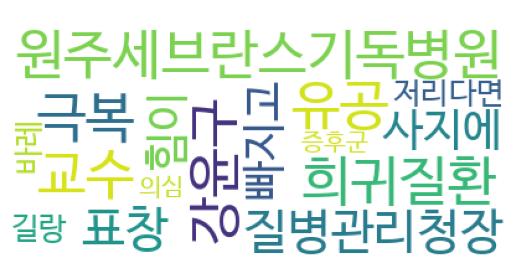

In [36]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### Pickle화